In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime
import glob
import pickle
from datetime import datetime, timedelta
import sys
from scipy.optimize import curve_fit
from matplotlib.lines import Line2D

#import the folder that has the analysis level class
sys.path.append("/Users/linsi/Documents/stanford/HV/ad2-data-processing/CombinedData/")
sys.path.append("/Users/linsi/Documents/stanford/HV/ad2-data-processing/AnalysisTools/")
import Dataset
import AnalysisTools

In [2]:
topdirs = {5:"/Users/linsi/Documents/stanford/HV/data/Run5/", 6:"/Users/linsi/Documents/stanford/HV/data/Run6/", 7:"/Users/linsi/Documents/stanford/HV/data/Run7/", 8:"/Users/linsi/Documents/stanford/HV/data/Run8/", 9:"/Users/linsi/Documents/stanford/HV/data/Run9/"}
configs = {5:"/Users/linsi/Documents/stanford/HV/ad2-data-processing/configs/run5_config.yaml", 6:"/Users/linsi/Documents/stanford/HV/ad2-data-processing/configs/run6_config.yaml", 7:"/Users/linsi/Documents/stanford/HV/ad2-data-processing/configs/run7_config.yaml", 8:"/Users/linsi/Documents/stanford/HV/ad2-data-processing/configs/run8_config.yaml", 9:"/Users/linsi/Documents/stanford/HV/ad2-data-processing/configs/run9_config.yaml"}
titles = {5:"SS uncoated", 6:"Refill of SS uncoated", 7:"MgF2 (50nm)", 8:"Pt (50nm)", 9:"MgF2 (20nm)"}
red_file_name = "combined_reduced.p"
#analysis tools objects, unloaded data
anas = {}
for n in topdirs:
    anas[n] = AnalysisTools.AnalysisTools(topdirs[n]+red_file_name, configs[n], title=titles[n], ramp_topdir=topdirs[n])

/Users/linsi/Documents/stanford/HV/ad2-data-processing/AnalysisTools/AnalysisTools.py:127: UserWarning: genfromtxt: Empty input file: "/Users/linsi/Documents/stanford/HV/data/Run8/ds03/g_events.txt"
  d = np.genfromtxt(os.path.join(root, self.config["g_events_name"]), delimiter=',', dtype=float)


In [3]:
#load data into mem if you want
for n, ana in anas.items():
    #if(n==5 or n == 6): continue
    ana.load_dataframe()

## PMT Amplitudes

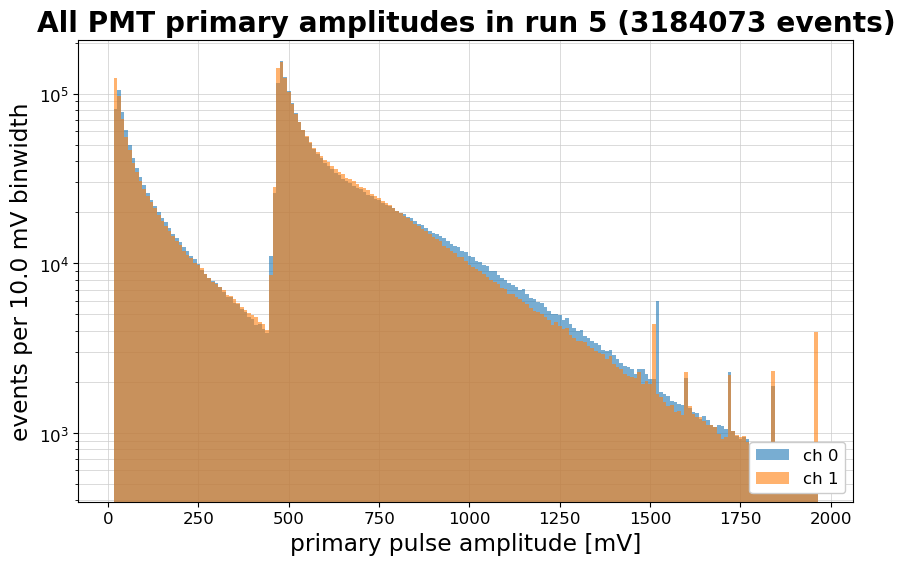

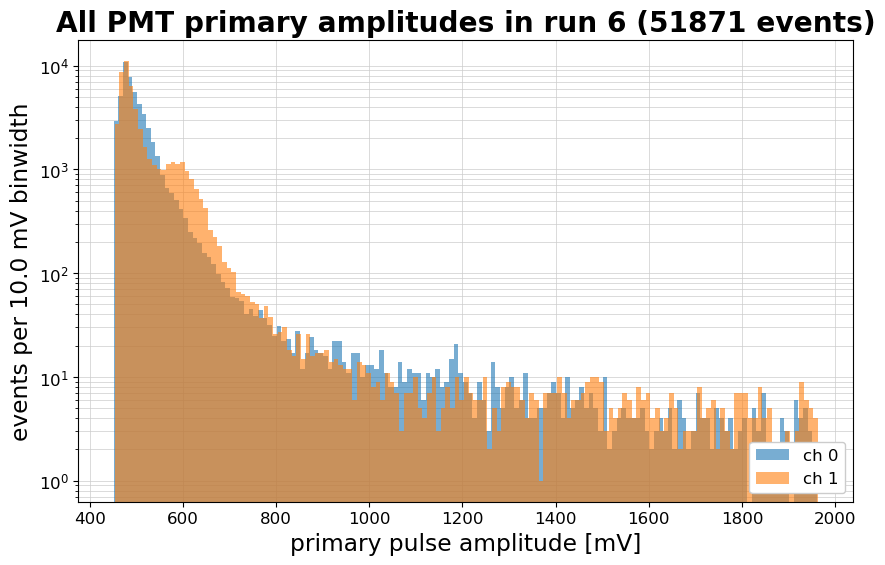

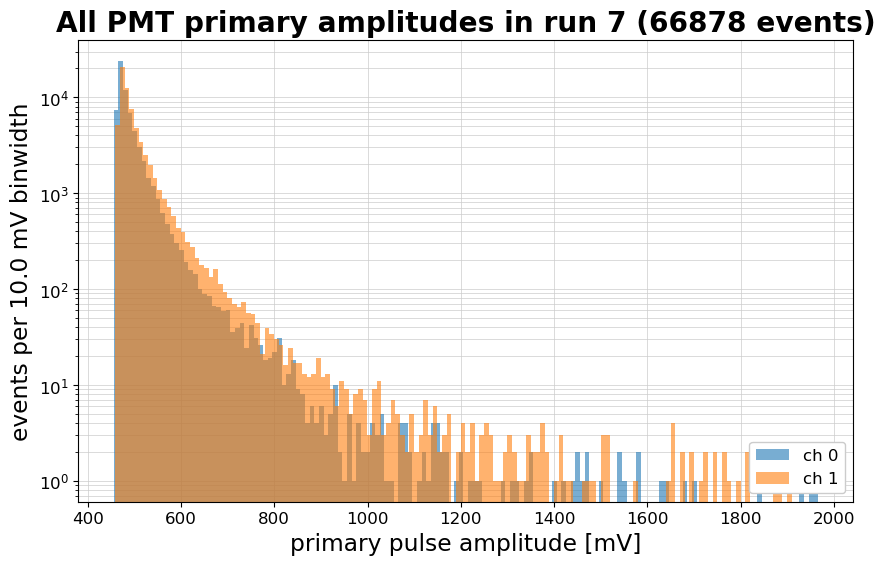

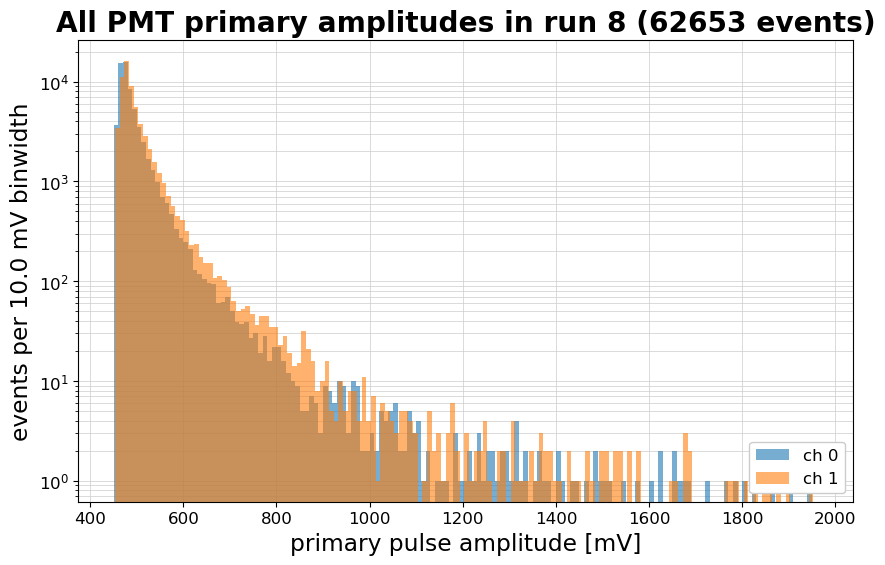

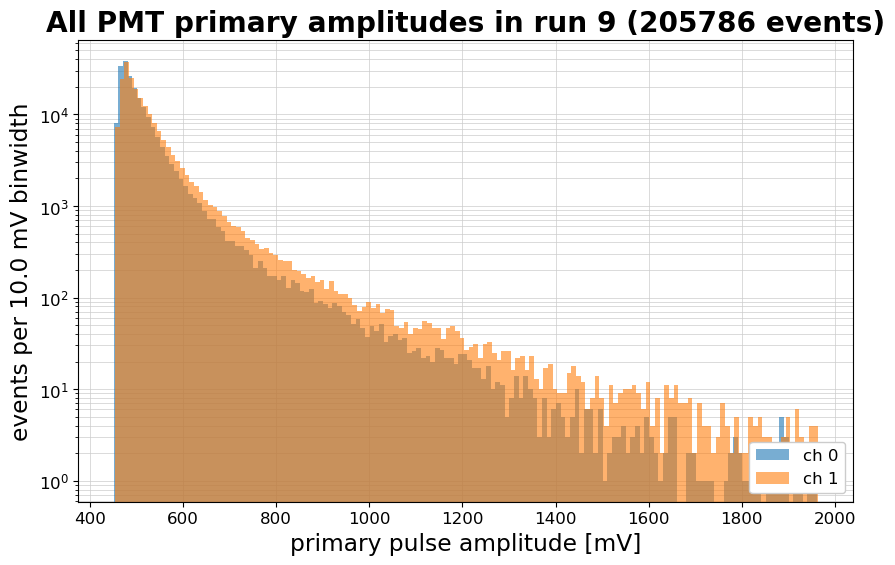

In [69]:
#reproduce some of the plots above
for run, ana in anas.items():
    if ana.df is None: continue
    d = ana.df
    fig, ax = plt.subplots()
    h = np.array(d["ch0 amp"])
    h = h[~np.equal(h, None)]
    binwidth = 10 #mV
    bins = np.arange(min(h), max(h), binwidth)
    ax.hist(h, bins=bins, label="ch 0", alpha=0.6)

    h = np.array(d["ch1 amp"])
    h = h[~np.equal(h, None)]
    binwidth = 10 #mV
    bins = np.arange(min(h), max(h), binwidth)
    ax.hist(h, bins=bins, label="ch 1", alpha=0.6)

    ax.legend()
    ax.set_xlabel("primary pulse amplitude [mV]")
    ax.set_ylabel("events per {:.1f} mV binwidth".format(binwidth))
    ax.set_title("All PMT primary amplitudes in run {:d} ({:d} events)".format(run, len(h)))
    ax.set_yscale('log')
    plt.show()

NameError: name 'ds' is not defined

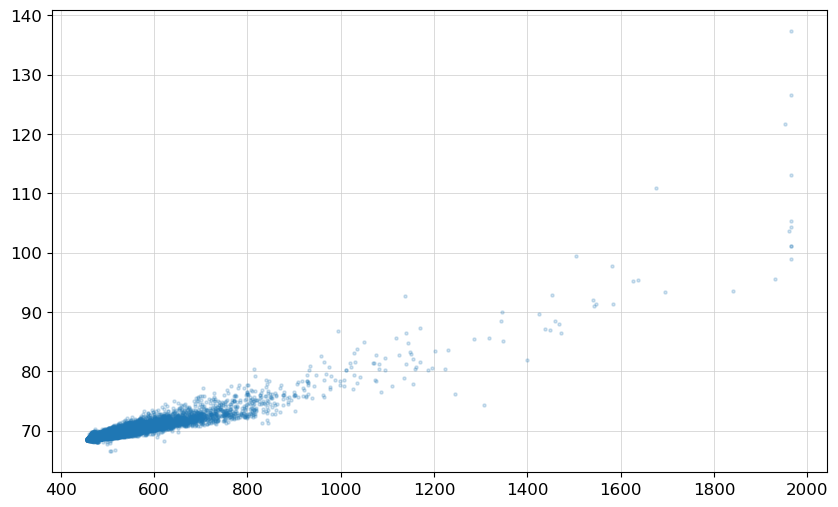

In [70]:
d = anas[7].df
fig, ax = plt.subplots()
h1 = np.array(d["ch0 trigger integral"])
#h1 = h1[~np.equal(h, None)]
h2 = np.array(d["ch0 amp"])
#h2 = h2[~np.equal(h, None)]
ax.scatter(h2, h1, alpha=0.2, s=5, label="All PMT events during HV ramping")

d = ds.reduced_df
h1 = np.array(d["ch0 trigger integral"])
#h1 = h1[~np.equal(h, None)]
h2 = np.array(d["ch0 amp"])
#h2 = h2[~np.equal(h, None)]
ax.scatter(h2, h1, alpha=0.2, s=5, label="Cosmics no HV")


ax.legend(markerscale=8)
ax.set_ylim([-1, 6])
ax.set_xlim([0, 200])
ax.set_xlabel("primary pulse amplitude [mV]")
ax.set_ylabel("primary pulse integral [mV*us]")
ax.set_title("All of Run 7 PMT events, at 0V and HV ramping separated")
#ax.set_yscale('log')
plt.show()

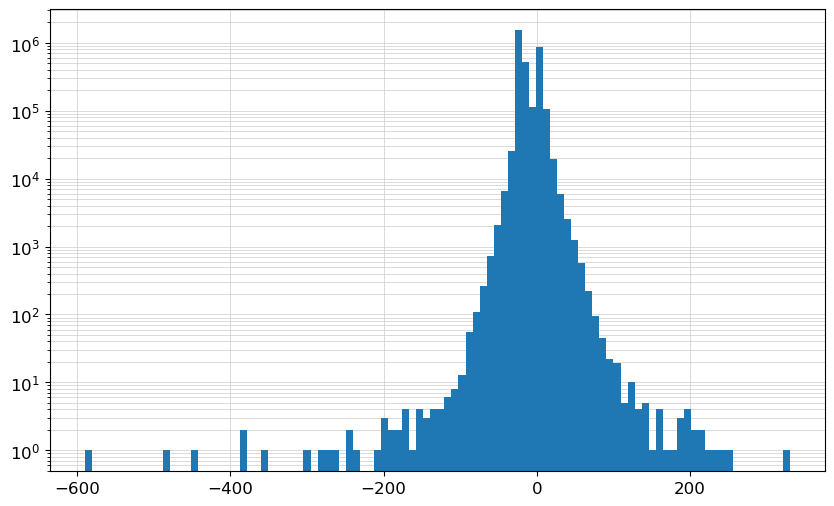

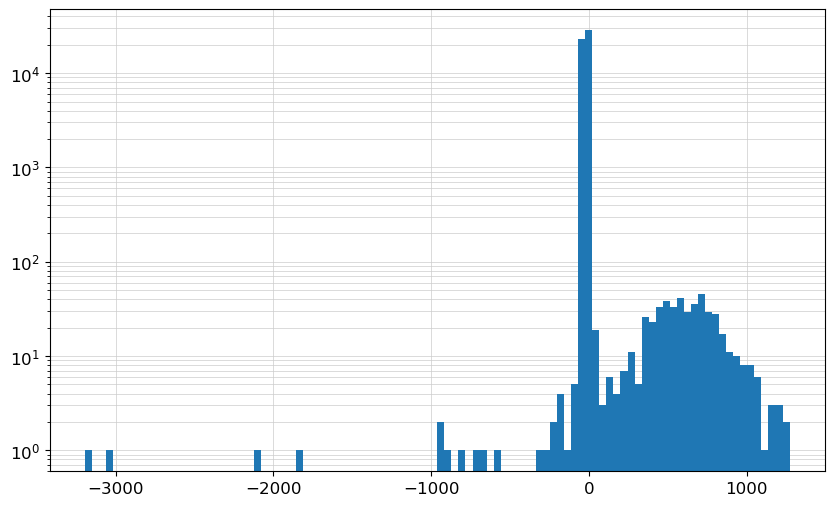

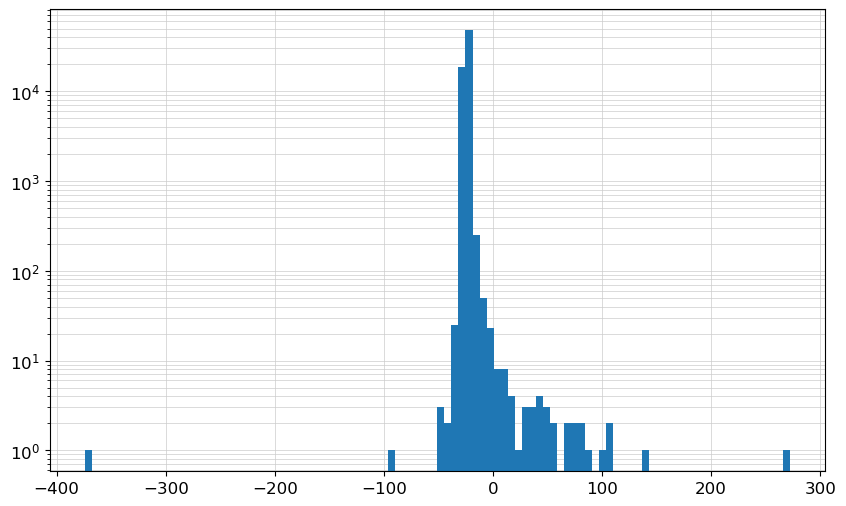

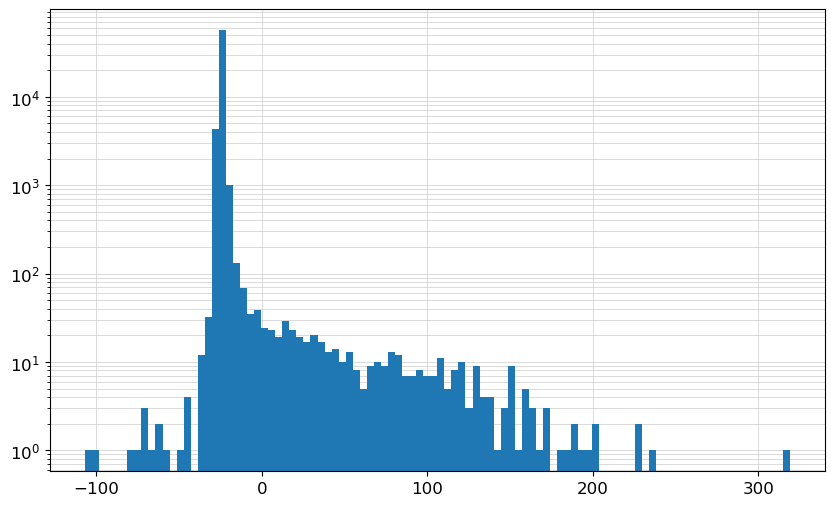

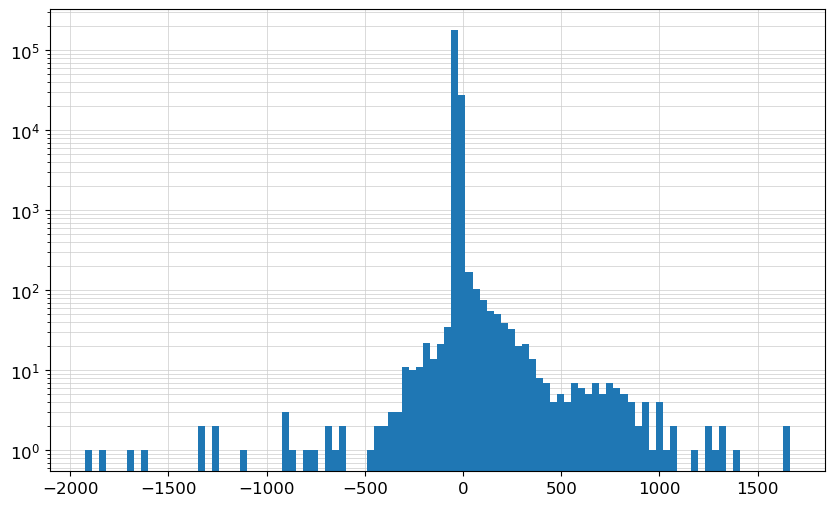

In [71]:
for run, ana in anas.items():
    if ana.df is None: continue
    d = ana.df
    ch0_int = np.array(d["ch0 afterpulse integral"])
    ch0_int = ch0_int[~np.equal(ch0_int, None)]
    ch0_base = np.array(d["ch0 postbaseline"])
    ch0_base = 7.5*ch0_base[~np.equal(ch0_base, None)]
    ch0_int = ch0_int - ch0_base

    ch1_int = np.array(d["ch1 afterpulse integral"])
    ch1_int = ch1_int[~np.equal(ch1_int, None)]
    ch1_base = np.array(d["ch1 postbaseline"])
    ch1_base = 7.5*ch1_base[~np.equal(ch1_base, None)]
    ch1_int = ch1_int - ch1_base

    total_int = ch1_int + ch0_int

    fig, ax = plt.subplots()
    ax.hist(total_int, 100)
    ax.set_yscale('log')
    plt.show()


## Anode charge

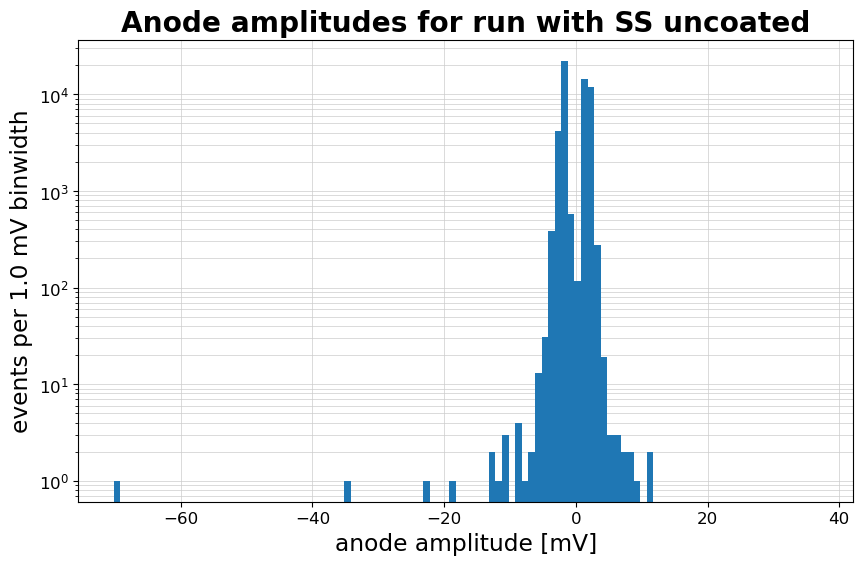

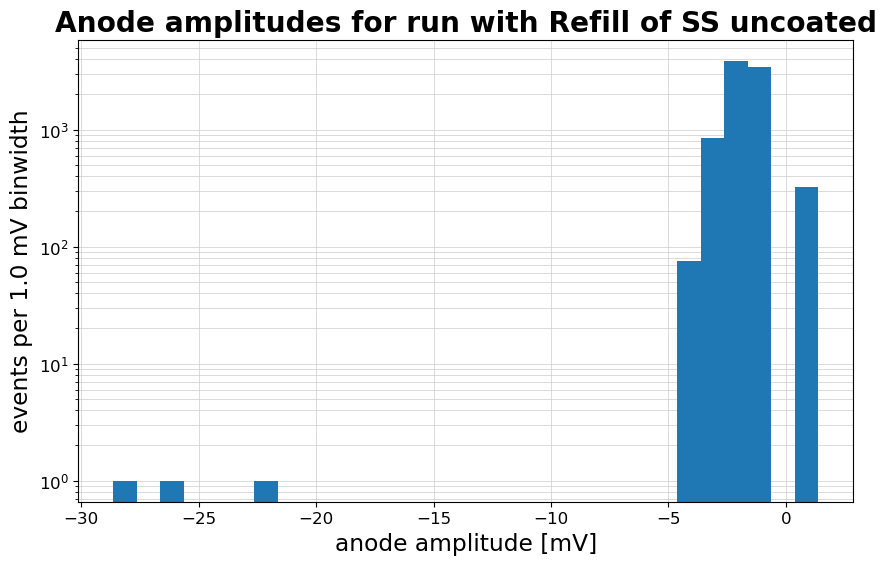

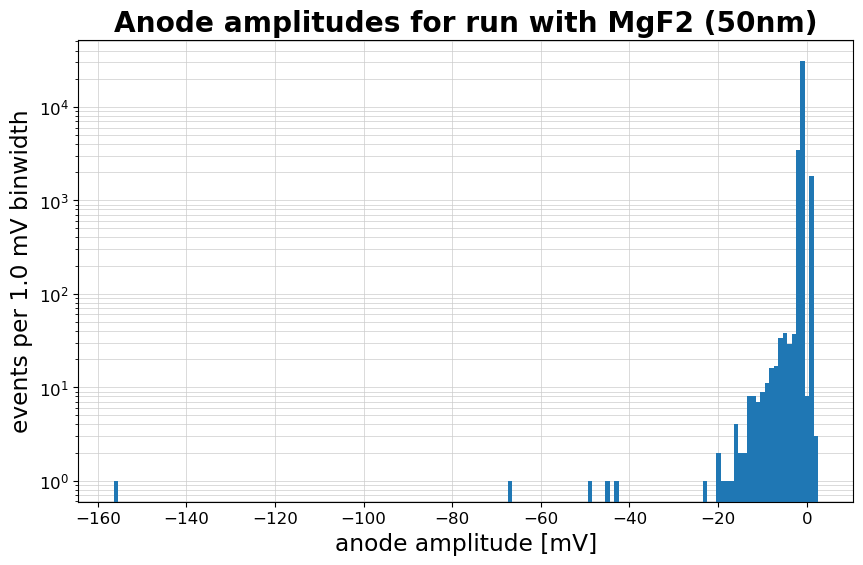

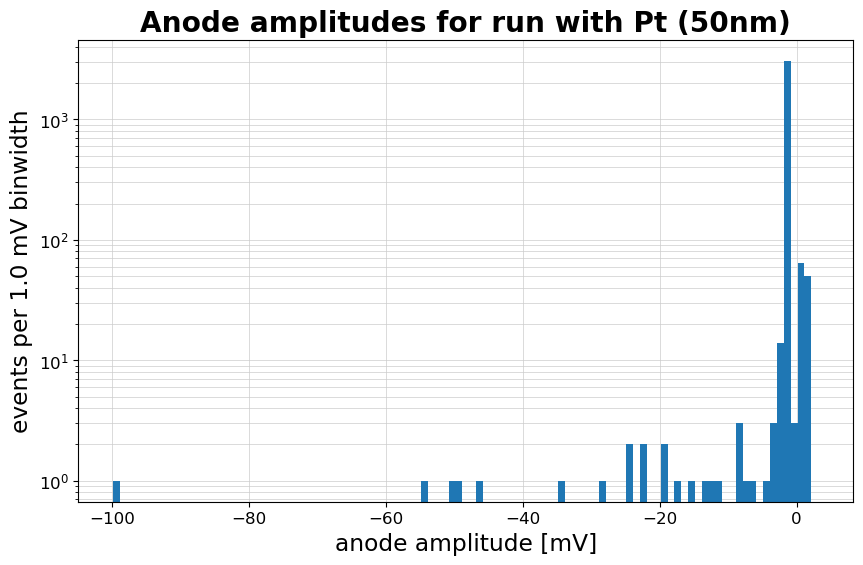

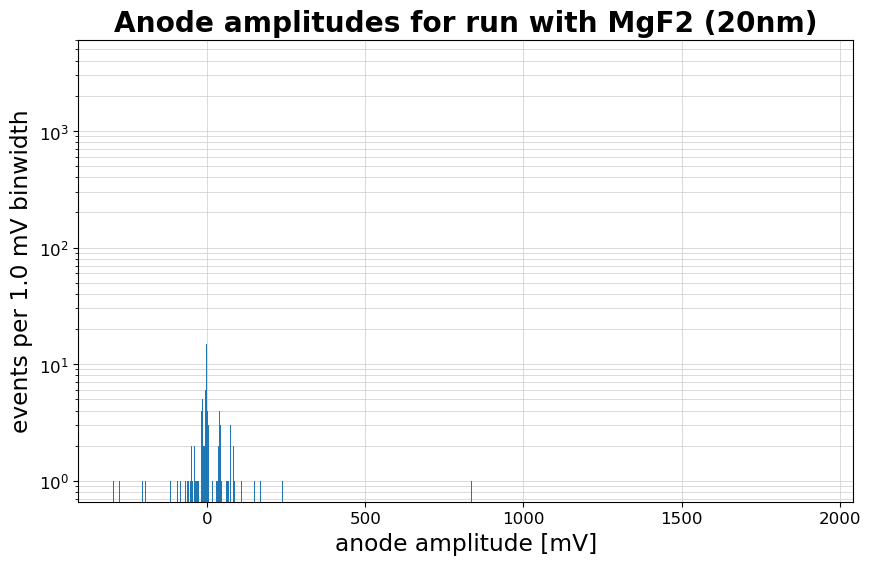

In [72]:
for run, ana in anas.items():
    if ana.df is None: continue
    fig, ax = plt.subplots()
    d = ana.df
    ampdf = d[~d["ch3 amp"].isna()]
    h = np.array(ampdf["ch3 amp"])
    binwidth = 1 #mV
    #protect against huge bounds and misreconstructed amplitudes
    bins = np.arange(np.min(h), np.max(h), binwidth)
    ax.hist(h, bins=bins)

    ax.set_xlabel("anode amplitude [mV]")
    ax.set_ylabel("events per {:.1f} mV binwidth".format(binwidth))
    ax.set_title("Anode amplitudes for run with " + ana.title)
    ax.set_yscale('log')
    plt.show()

## Peak multiplicities

In [ ]:
#Multiplicities
fig, ax = plt.subplots()
barwidth = 0.1
total_events_run = {}
for i, (run, ana) in enumerate(anas.items()):
    if ana.df is None: continue
    d = ana.df
    npeaks = np.array(d["ch3 n negpeaks"])
    npeaks = npeaks[~np.equal(npeaks, None)]
    npeaks_set = list(set(npeaks))
    npeaks_count = {}
    total_nonzero = 0
    for n in npeaks_set:
        npeaks_count[n] = len(np.where(npeaks == n)[0])
        if(n != 0):
            total_nonzero += npeaks_count[n]
    plotlist = []
    for n in npeaks_count:
        if(n == 0): continue
        plotlist.append(npeaks_count[n]/total_nonzero)
    
    total_events_run[run] = total_nonzero


    pos = np.array([_ for _ in npeaks_count if _ != 0])
    ax.bar(pos + (i - 1)*barwidth, plotlist, barwidth, label="Run {:d}".format(run))

ax.legend()
ax.set_yscale('log')
ax.set_ylabel("Fraction of events with N peaks in charge waveform")
ax.set_xlabel("N peaks in charge waveform")
ax.set_title("Run 5: {:d} evts, Run 6: {:d} evts, Run 7: {:d} evts, Run 8: {:d} evts".format(total_events_run[5],total_events_run[6],total_events_run[7], total_events_run[8]))
plt.show()


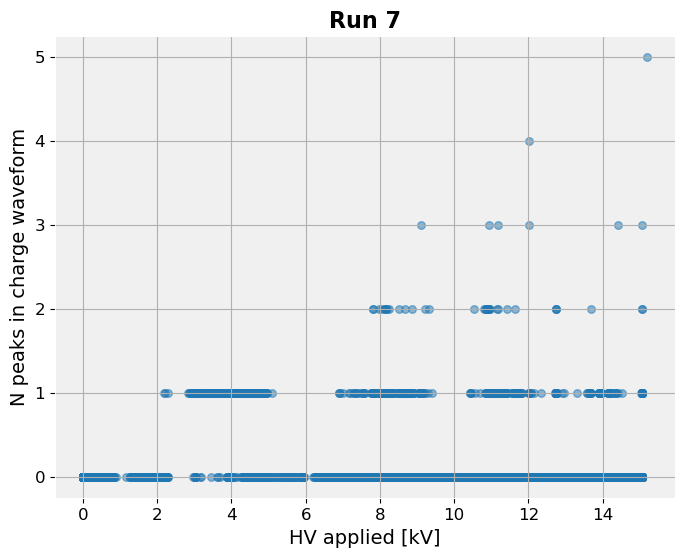

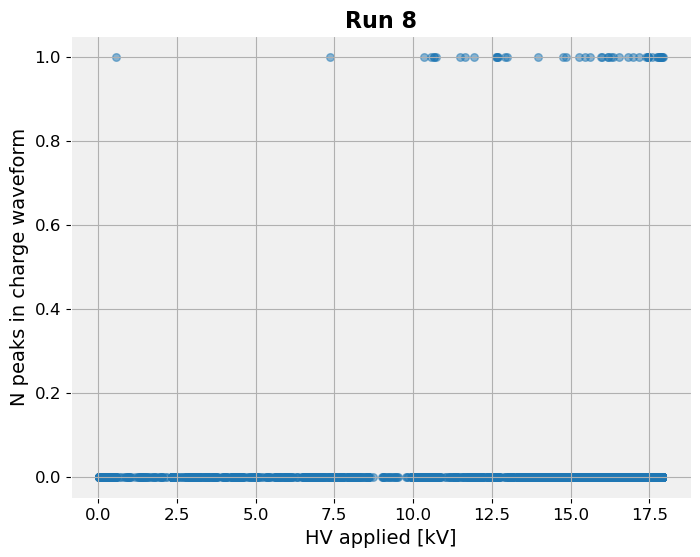

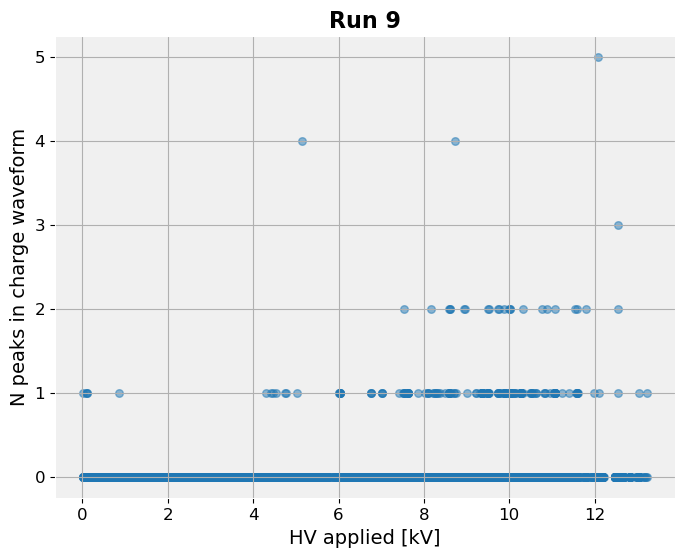

In [37]:
#Multiplicities

for i, (run, ana) in enumerate(anas.items()):
    if ana.df is None: continue
    fig, ax = plt.subplots()
    d = ana.df
    npeaks = np.array(d["ch3 n negpeaks"])
    npeaks = npeaks[~np.equal(npeaks, None)]
    kv = np.array(d["ch3 hv"])
    kv = kv[~np.equal(kv, None)]
    ax.scatter(kv, npeaks, alpha=0.5, s=30)
    

    #ax.legend()
    ax.set_ylabel("N peaks in charge waveform")
    ax.set_xlabel("HV applied [kV]")
    ax.set_title("Run {:d}".format(run))
    #ax.set_xlim([5, 15])
    plt.show()


# Waveform plotting tools, which require cluster operation for access to prereduced

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[3]


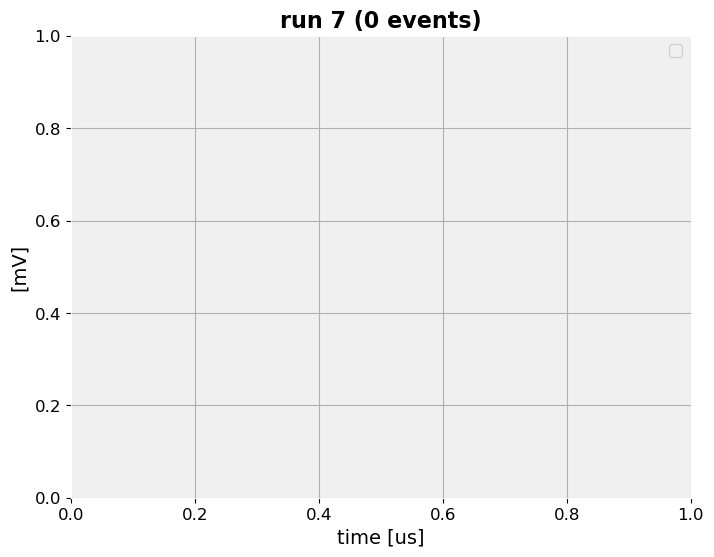

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[3]


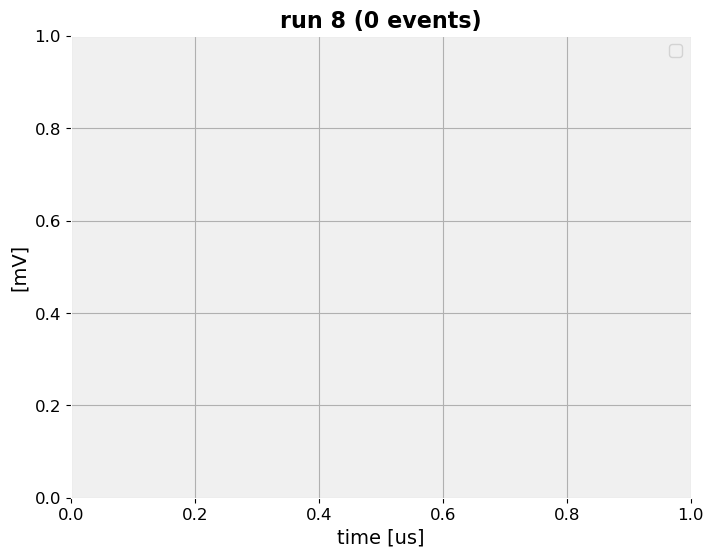

[3]


FileNotFoundError: [Errno 2] No such file or directory: '/p/lustre2/nexouser/data/StanfordData/angelico/hv-test-chamber/Run9/ds08/prereduced_ad2.p'

In [40]:
#waveform plotting tool (not tested, need cluster where all prereduced data sits. )
for run, ana in anas.items():
    if ana.df is None: continue
    d = ana.df
    mask = (d["ch3 amp"] > 20)
    sw_chs = [3]
    events = ana.get_waveforms_from_cuts(mask, sw_chs)[3]
    fig, ax = plt.subplots()
    for ev in events:
        times = np.arange(0, ev["dT"]*1e6*len(ev["Data"][0]), ev["dT"]*1e6)
        ax.plot(times, ev["Data"][0])

    ax.legend()
    ax.set_xlabel("time [us]")
    ax.set_ylabel('[mV]')
    ax.set_title("run {:d} ({:d} events)".format(run, len(events)))
    plt.show()

## History plots

/Users/linsi/Documents/stanford/HV/ad2-data-processing/AnalysisTools/AnalysisTools.py:127: UserWarning: genfromtxt: Empty input file: "/Users/linsi/Documents/stanford/HV/data/Run8/ds03/g_events.txt"
  d = np.genfromtxt(os.path.join(root, self.config["g_events_name"]), delimiter=',', dtype=float)


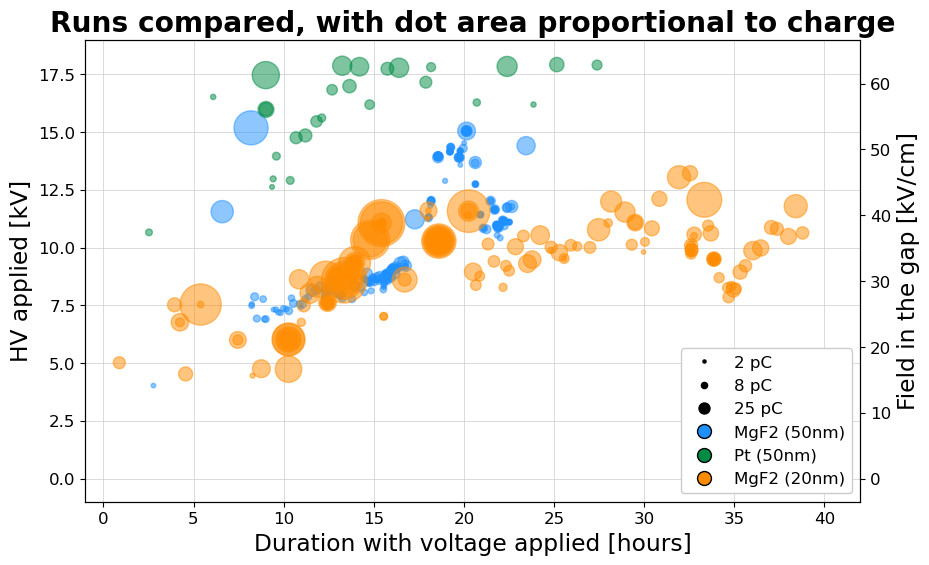

In [56]:
import matplotlib.pyplot as plt
plt.style.use('/Users/linsi/Documents/stanford/pythonstyle/evanstyle.mplstyle')

#colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = ['#1E90FF','#008B45','#FF8C00']
charge_dot_scale = 10

fig, ax = plt.subplots()
ax.set_ylim([-1, 19]) #fixed axis for all
ax.set_xlim([-1, 42])
ax2 = ax.twinx()
E_f = lambda V:V/0.285
ymin, ymax = ax.get_ylim()
ax2.set_ylim(E_f(ymin), E_f(ymax))
ax2.plot([], [])

# Define custom legend entries with markers
legend_elements = [\
    Line2D([0], [0], marker='o', linewidth=0, color='k', markersize=np.sqrt(2*charge_dot_scale)/2, label='2 pC'),
    Line2D([0], [0], marker='o', linewidth=0, color='k', markersize=np.sqrt(8*charge_dot_scale)/2, label='8 pC'),
    Line2D([0], [0], marker='o', linewidth=0, color='k', markersize=np.sqrt(25*charge_dot_scale)/2, label='25 pC')]

for i, run in enumerate([7,8,9]):
    ana = anas[run]
    d = ana.df
    d = d[~d["ch3 charge"].isna()]
    ana.load_hv_textfiles()
    ana.identify_ramps(ref='v_mon')
    tdmap = ana.time_duration_map
    #ax.plot(np.array(tdmap["dur"])/3600, tdmap["v"], color='k', linewidth=0.7, alpha=0.5)

    #negative polar events
    mask = (d["ch3 n negpeaks"] > 0) & (d["ch3 n pospeaks"] == 0) & (np.abs(d["ch3 charge"]) > 1)
    d_ch = np.abs(np.array(d[mask]["ch3 charge"]))
    d_sec = np.array(d[mask]["ch3 seconds"])
    d_hv = np.array(d[mask]["ch3 hv"])
    d_E = np.array(d[mask]["ch3 field"])

    #recast time
    hv_event_durs = [ana.get_duration_from_timestamp(_)/3600 for _ in d_sec]
    ax.scatter(hv_event_durs, d_hv, s=list(np.array(d_ch)*charge_dot_scale), marker='o', alpha=0.5, facecolor=colors[i], edgecolor=colors[i])
    #ax.plot(hv_event_durs, d_hv, 'k-', alpha=0.3)
    #negative polar events
    mask = (d["ch3 n negpeaks"] == 0) & (d["ch3 n pospeaks"] > 0) 
    d_ch = np.abs(np.array(d[mask]["ch3 charge"]))
    d_sec = np.array(d[mask]["ch3 seconds"])
    d_hv = np.array(d[mask]["ch3 hv"])
    d_E = np.array(d[mask]["ch3 field"])

    

    #recast time
    hv_event_durs = [ana.get_duration_from_timestamp(_)/3600 for _ in d_sec]
    
    #ax.scatter(hv_event_durs, d_hv, s=list(np.array(d_ch)*charge_dot_scale), marker='v', alpha=0.5, facecolor=colors[i], edgecolor=colors[i])
    #ax.plot(hv_event_durs, d_hv,  'k-', alpha=0.3)
    legend_elements.append(Line2D([0], [0], marker='o', linewidth=0, color=colors[i], markersize=10, label=ana.title))


# Add legend with custom legend entries and solid color bounding background box
ax.legend(handles=legend_elements, loc='lower right', frameon=True)

ax.set_ylabel("HV applied [kV]")
ax2.set_ylabel("Field in the gap [kV/cm]")
ax2.grid(False)
ax.set_xlabel("Duration with voltage applied [hours]")
ax.set_title("Runs compared, with dot area proportional to charge")
plt.show()


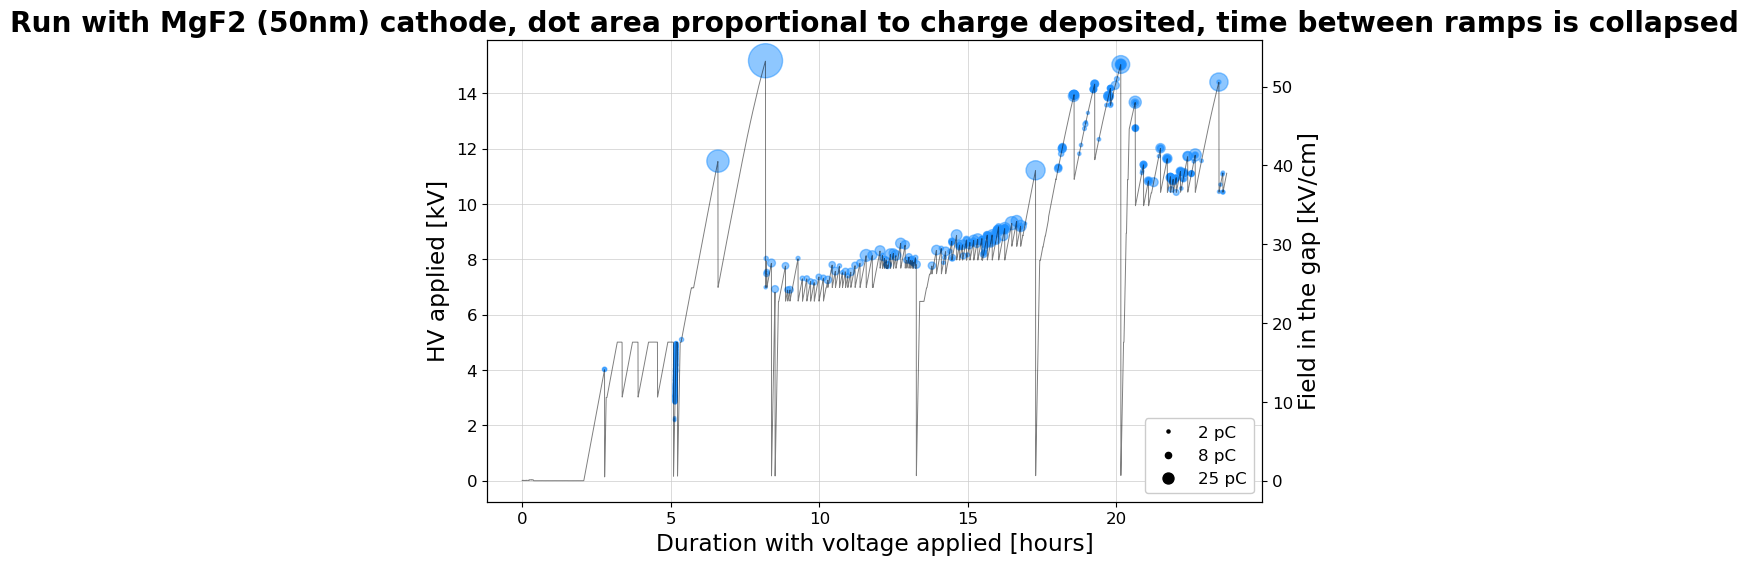

/Users/linsi/Documents/stanford/HV/ad2-data-processing/AnalysisTools/AnalysisTools.py:127: UserWarning: genfromtxt: Empty input file: "/Users/linsi/Documents/stanford/HV/data/Run8/ds03/g_events.txt"
  d = np.genfromtxt(os.path.join(root, self.config["g_events_name"]), delimiter=',', dtype=float)


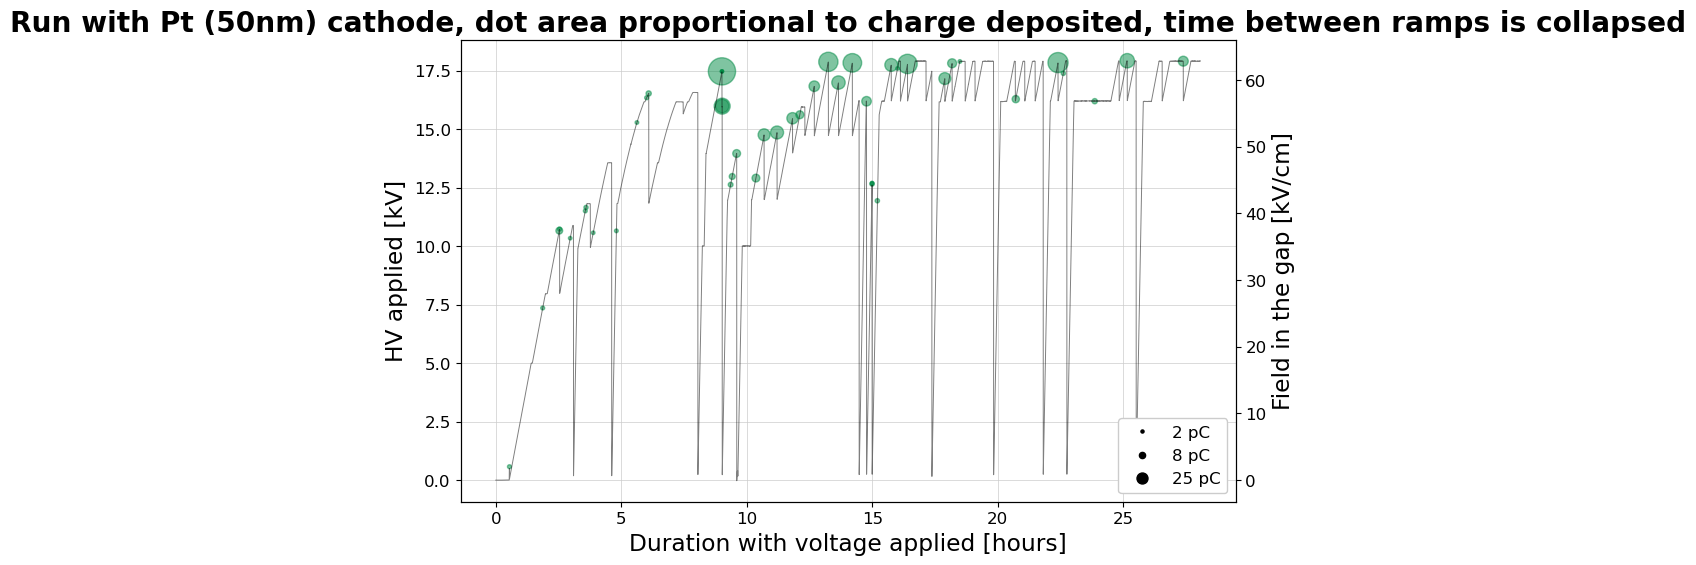

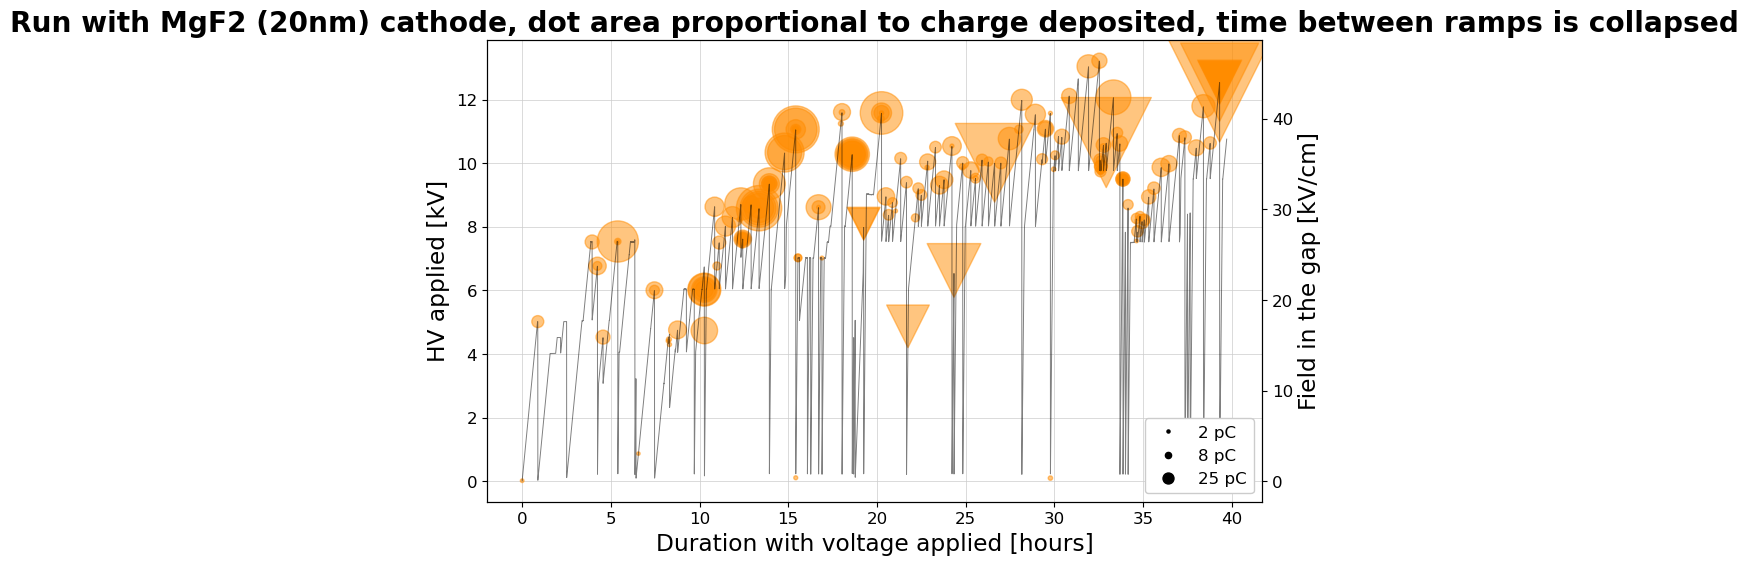

In [57]:
colors = ['#1E90FF','#008B45','#FF8C00']
charge_dot_scale = 10



# Define custom legend entries with markers
legend_elements = [\
    Line2D([0], [0], marker='o', linewidth=0, color='k', markersize=np.sqrt(2*charge_dot_scale)/2, label='2 pC'),
    Line2D([0], [0], marker='o', linewidth=0, color='k', markersize=np.sqrt(8*charge_dot_scale)/2, label='8 pC'),
    Line2D([0], [0], marker='o', linewidth=0, color='k', markersize=np.sqrt(25*charge_dot_scale)/2, label='25 pC')]

for i, run in enumerate([7,8,9]):
    fig, ax = plt.subplots()
    #ax.set_ylim([-1, 19]) #fixed axis for all
    #ax.set_xlim([-1, 42])
    
    ana = anas[run]
    d = ana.df
    d = d[~d["ch3 charge"].isna()]
    ana.load_hv_textfiles()
    ana.identify_ramps(ref='v_mon')
    tdmap = ana.time_duration_map
    ax.plot(np.array(tdmap["dur"])/3600, tdmap["v"], color='k', linewidth=0.7, alpha=0.5)

    #negative polar events
    mask = (d["ch3 n negpeaks"] > 0) & (d["ch3 n pospeaks"] == 0)# & (np.abs(d["ch3 charge"]) > 1)
    d_ch = np.abs(np.array(d[mask]["ch3 charge"]))
    d_sec = np.array(d[mask]["ch3 seconds"])
    d_hv = np.array(d[mask]["ch3 hv"])
    d_E = np.array(d[mask]["ch3 field"])

    #recast time
    hv_event_durs = [ana.get_duration_from_timestamp(_)/3600 for _ in d_sec]
    ax.scatter(hv_event_durs, d_hv, s=list(np.array(d_ch)*charge_dot_scale), marker='o', alpha=0.5, facecolor=colors[i], edgecolor=colors[i])

    #positive polar
    mask = (d["ch3 n pospeaks"] > 1)# & (np.abs(d["ch3 charge"]) > 1)
    d_ch = np.abs(np.array(d[mask]["ch3 charge"]))
    d_sec = np.array(d[mask]["ch3 seconds"])
    d_hv = np.array(d[mask]["ch3 hv"])
    d_E = np.array(d[mask]["ch3 field"])

    #recast time
    hv_event_durs = [ana.get_duration_from_timestamp(_)/3600 for _ in d_sec]
    ax.scatter(hv_event_durs, d_hv, s=list(np.array(d_ch)*charge_dot_scale), marker='v', alpha=0.5, facecolor=colors[i], edgecolor=colors[i])

    ax2 = ax.twinx()
    E_f = lambda V:V/0.285
    ymin, ymax = ax.get_ylim()
    ax2.set_ylim(E_f(ymin), E_f(ymax))
    ax2.plot([], [])
        
    # Add legend with custom legend entries
    ax.legend(handles=legend_elements, loc='lower right')
    ax.set_ylabel("HV applied [kV]")
    ax2.set_ylabel("Field in the gap [kV/cm]")
    ax2.grid(False)
    ax.set_xlabel("Duration with voltage applied [hours]")
    ax.set_title("Run with {} cathode, dot area proportional to charge deposited, time between ramps is collapsed".format(ana.title))
    plt.show()




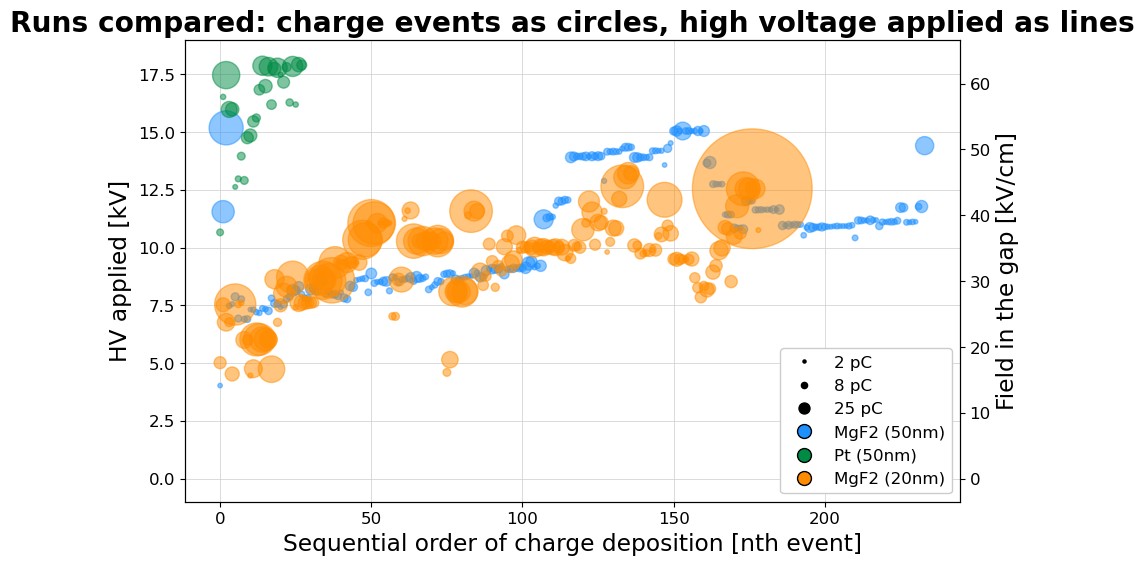

In [58]:
colors = ['#1E90FF','#008B45','#FF8C00']
charge_dot_scale = 10

fig, ax = plt.subplots()
ax.set_ylim([-1, 19]) #fixed axis for all
#ax.set_xlim([-1, 42])
ax2 = ax.twinx()
E_f = lambda V:V/0.285
ymin, ymax = ax.get_ylim()
ax2.set_ylim(E_f(ymin), E_f(ymax))
ax2.plot([], [])

# Define custom legend entries with markers
legend_elements = [\
    Line2D([0], [0], marker='o', linewidth=0, color='k', markersize=np.sqrt(2*charge_dot_scale)/2, label='2 pC'),
    Line2D([0], [0], marker='o', linewidth=0, color='k', markersize=np.sqrt(8*charge_dot_scale)/2, label='8 pC'),
    Line2D([0], [0], marker='o', linewidth=0, color='k', markersize=np.sqrt(25*charge_dot_scale)/2, label='25 pC')]

for i, run in enumerate([7,8,9]):
    ana = anas[run]
    d = ana.df
    d = d[~d["ch3 charge"].isna()]

    #get all events with any amount of charge
    mask = ((d["ch3 n negpeaks"] > 0) | (d["ch3 n pospeaks"] == 0)) & (np.abs(d["ch3 charge"]) > 1)
    d_ch = np.array(d[mask]["ch3 charge"])
    d_sec = np.array(d[mask]["ch3 seconds"])
    d_hv = np.array(d[mask]["ch3 hv"])

    #sort all three lists by the order of d_sec
    d_sec, d_ch, d_hv = zip(*sorted(zip(d_sec, d_ch, d_hv)))

    ax.scatter(range(len(d_hv)), d_hv, s=list(np.abs(np.array(d_ch))*charge_dot_scale), marker='o', alpha=0.5, facecolor=colors[i], edgecolor=colors[i])
    legend_elements.append(Line2D([0], [0], marker='o', linewidth=0, color=colors[i], markersize=10, label=ana.title))


# Add legend with custom legend entries and solid color bounding background box
ax.legend(handles=legend_elements, loc='lower right', frameon=True)
    
ax.set_ylabel("HV applied [kV]")
ax2.set_ylabel("Field in the gap [kV/cm]")
ax2.grid(False)
ax.set_xlabel("Sequential order of charge deposition [nth event]")
ax.set_title("Runs compared: charge events as circles, high voltage applied as lines")
plt.show()

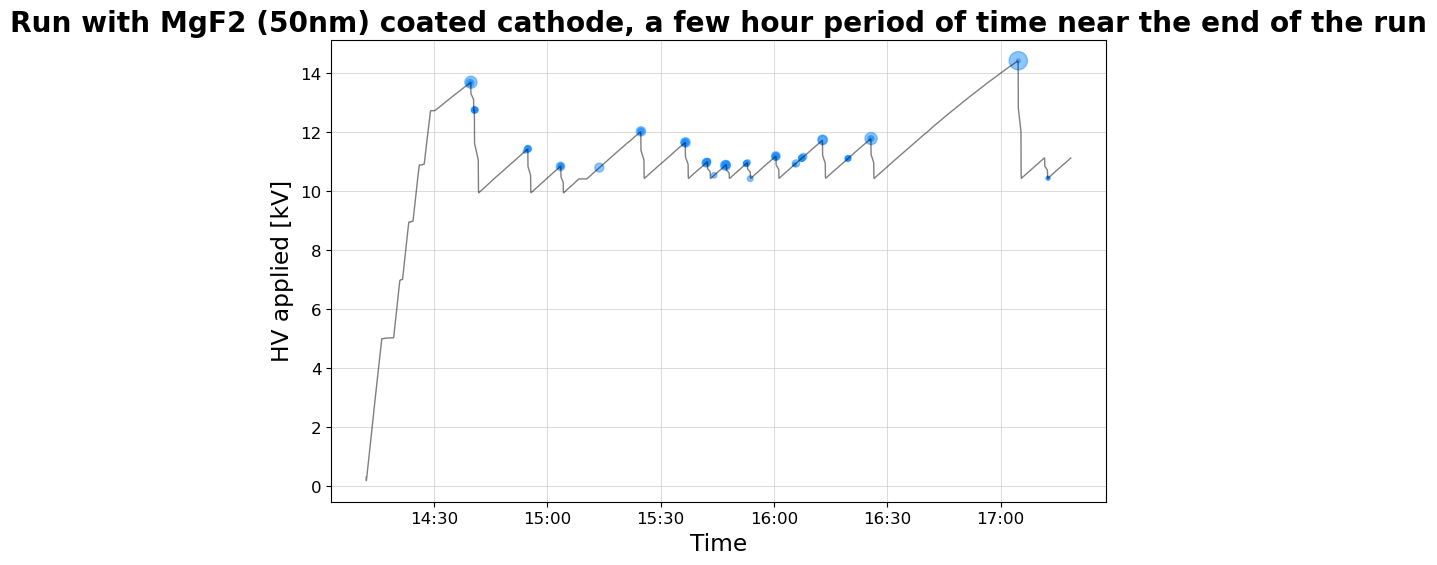

In [59]:
#now we move to a time based history plot that requires a time window
colors = ['#1E90FF','#008B45','#FF8C00']
charge_dot_scale = 10

ana = anas[7]
d = ana.df 
d = d[~d["ch3 charge"].isna()]
ana.load_hv_textfiles()
ana.identify_ramps(ref='v_mon')
tdmap = ana.time_duration_map

#tdmap is of the form {"dur":[], "v":[], "t":[]}
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define the time window using datetime dates
start_date = datetime(2023, 7, 31, 14, 12, 0)
end_date = datetime(2023, 7, 31, 18, 30, 0)

# Convert the datetime dates to timestamps in seconds
start_timestamp = start_date.timestamp()
end_timestamp = end_date.timestamp()
# Filter the tdmap based on the time window
filtered_tdmap = {key: [] for key in tdmap.keys()}
for i, timestamp in enumerate(tdmap["t"]):
    if start_timestamp <= timestamp <= end_timestamp:
        for key in tdmap.keys():
            if(key == "t"):
                filtered_tdmap[key].append(datetime.fromtimestamp(tdmap[key][i]))
            else:
                filtered_tdmap[key].append(tdmap[key][i])


# Plot the high voltage applied during the time window
fig, ax = plt.subplots()
ax.plot(filtered_tdmap["t"], filtered_tdmap["v"], color='k', linewidth=1, alpha=0.5)
ax.set_xlabel("Time")
ax.set_ylabel("HV applied [kV]")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

mask = (d["ch3 seconds"] < end_timestamp) & (d["ch3 seconds"] > start_timestamp) & (d["ch3 n negpeaks"] > 0) & (np.abs(d["ch3 charge"]) > 0.64)
d = d[mask]
# Scatter the ch3 charge events within the time window
ax.scatter([datetime.fromtimestamp(_) for _ in d["ch3 seconds"]], np.abs(d["ch3 hv"]), s=list((np.abs(np.array(d["ch3 charge"]))*charge_dot_scale)), marker='o', alpha=0.5, facecolor=colors[0])
ax.set_title("Run with {} coated cathode, a few hour period of time near the end of the run".format(ana.title))
plt.show()




In [60]:
print(start_date.timestamp())
print(datetime.fromtimestamp(filtered_tdmap["t"][0]))

1690837920.0


TypeError: 'datetime.datetime' object cannot be interpreted as an integer

## Comparisons with analytic stored charge and energy

In [61]:
C = 20 #pF
cq = 1.6e-19

dQs = np.array(np.linspace(0.5, 300, 100)) #pC
Vs = np.array(np.linspace(0, 19, 100)) #kV
Es = Vs/0.285
Qs = C*Vs*1000 #pC

U = 0.5*(Qs**2)/(C*1e6) #uJ

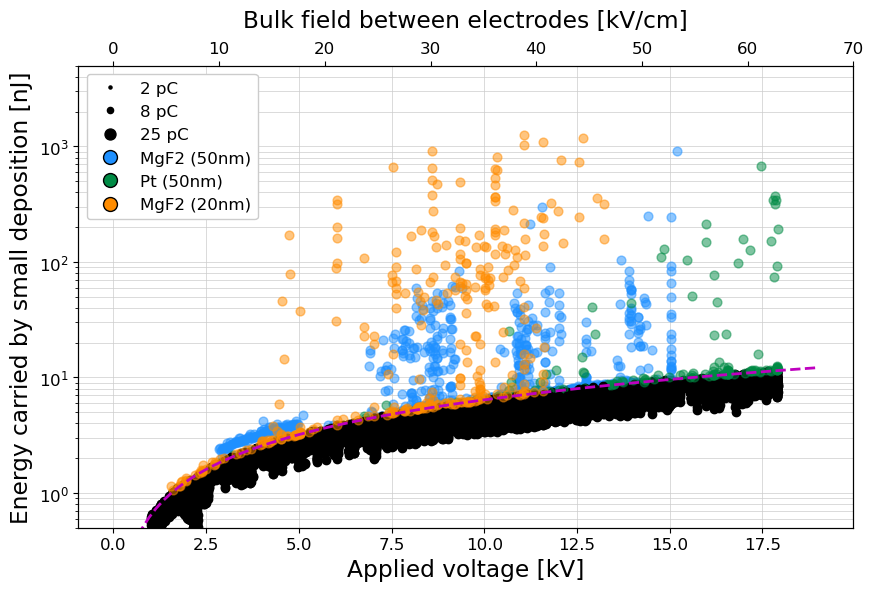

In [62]:
#get charge magnitudes and calculate partial energy
#deposited for each charge event in a run based on what
#voltage / total stored charge is in the gap at that moment. 

fig, ax = plt.subplots()
ax2 = ax.twiny()

hardware_threshold = 0.64 #pC
ax.plot(Vs, hardware_threshold*Vs, 'm--', label="{:.2f} pC threshold".format(hardware_threshold))
for i, run in enumerate([7,8,9]):
    ana = anas[run]
    d =  ana.df
    mask = (~d["ch3 energy"].isna()) & (~d["ch3 charge"].isna())
    d = d[mask]
    #plot noise events
    mask = (d["ch3 hv"] > 1) & (np.abs(d["ch3 charge"]) < hardware_threshold)
    du_evts = d[mask]

    ax.scatter(du_evts["ch3 hv"], np.abs(du_evts["ch3 energy"]), color='k')
    ax2.scatter(du_evts["ch3 field"], du_evts["ch3 energy"], color='k', alpha=0)

    #plot charge events
    mask = (d["ch3 hv"] > 1) & (d["ch3 charge"] < -1*hardware_threshold)
    du_evts = d[mask]

    ax.scatter(du_evts["ch3 hv"], np.abs(du_evts["ch3 energy"]), marker='o', facecolors=colors[i], s=40, label=ana.title, alpha=0.5)



ax.legend(handles=legend_elements, loc='upper left', frameon=True)
ax2.grid(False)
ax2.set_xlabel("Bulk field between electrodes [kV/cm]", labelpad=10)
ax.set_xlabel("Applied voltage [kV]")
ax.set_ylabel("Energy carried by small deposition [nJ]")
#ax.grid(color='k', alpha=0.3)
ax.set_yscale('log')
ax.set_ylim([5e-1, 5e3])

E_f = lambda V:V/0.285
ymin, ymax = ax.get_xlim()
ax2.set_xlim(E_f(ymin), E_f(ymax))

plt.show()

/var/folders/x3/8066bs2924s62zc70fd9f59w0000gn/T/ipykernel_90404/3653748702.py:8: RuntimeWarning: divide by zero encountered in divide
  ax.plot(Vs, hardware_threshold/Qs, 'm--',  label="{:.2f} pC threshold".format(hardware_threshold))


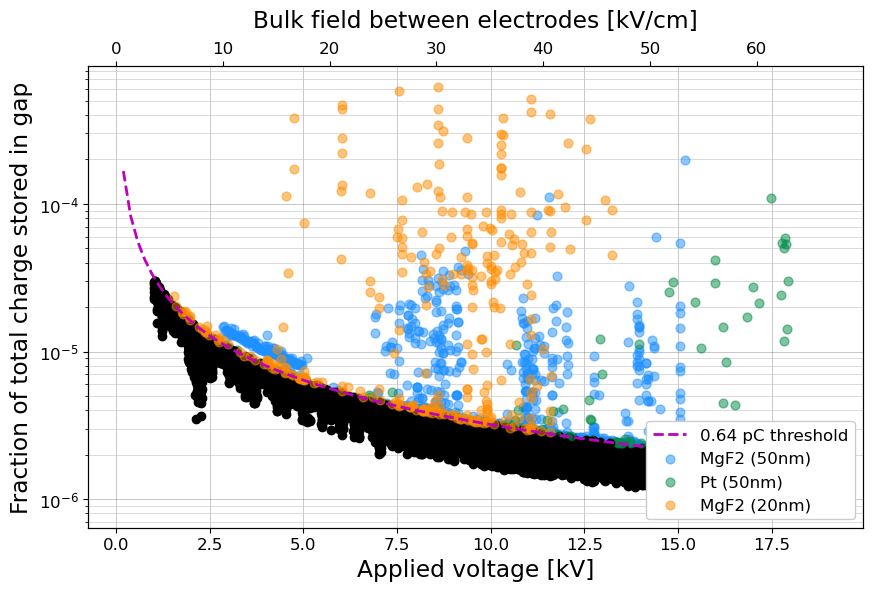

In [63]:
#similar as above, but now fractional stored charge. 

fig, ax = plt.subplots()


ax2 = ax.twiny()
hardware_threshold = 0.64 #pC
ax.plot(Vs, hardware_threshold/Qs, 'm--',  label="{:.2f} pC threshold".format(hardware_threshold))

for i, run in enumerate([7,8,9]):
    ana = anas[run]
    d =  ana.df
    d = d[~d["ch3 charge"].isna()]

    #plot noise events
    mask = (d["ch3 hv"] > 1) & (np.abs(d["ch3 charge"]) < hardware_threshold)
    du_evts = d[mask]
    totalq = C*du_evts["ch3 hv"]*1000
    ax.scatter(du_evts["ch3 hv"], np.abs(du_evts["ch3 charge"])/totalq, color='k')
    ax2.scatter(du_evts["ch3 field"], du_evts["ch3 charge"]/totalq, color='k', alpha=0)

    #plot signal events
    mask = (d["ch3 hv"] > 1) & (d["ch3 charge"] < -1*hardware_threshold)
    du_evts = d[mask]
    totalq = C*du_evts["ch3 hv"]*1000
    ax.scatter(du_evts["ch3 hv"], np.abs(du_evts["ch3 charge"])/totalq, marker='o', facecolors=colors[i], s=40, label=ana.title, alpha=0.5)



ax2.grid(False)
ax2.set_xlabel("Bulk field between electrodes [kV/cm]", labelpad=10)
ax.set_xlabel("Applied voltage [kV]")
ax.set_ylabel("Fraction of total charge stored in gap")
ax.legend(frameon=True)
ax.grid(color='k', alpha=0.3)
ax.set_yscale("log")
E_f = lambda V:V/0.285
ymin, ymax = ax.get_xlim()
ax2.set_xlim(E_f(ymin), E_f(ymax))

plt.show()

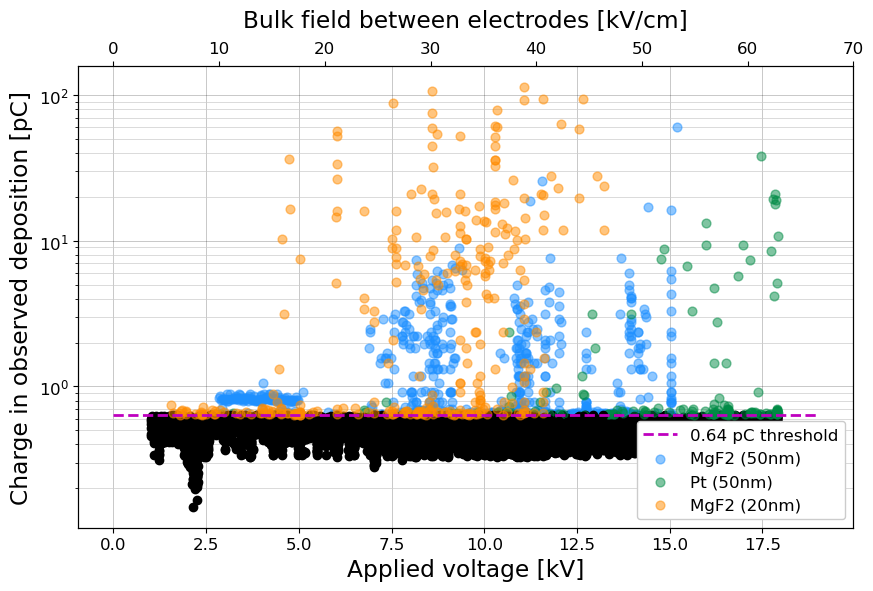

In [64]:
#similar as above, but now stored charge.
fig, ax = plt.subplots()
colors = ['#1E90FF','#008B45','#FF8C00']

ax2 = ax.twiny()
hardware_threshold = 0.64 #pC

#purple threshold line
ax.plot(Vs, [hardware_threshold]*len(Vs), 'm--',  label="{:.2f} pC threshold".format(hardware_threshold))


for i, run in enumerate([7,8,9]):
    ana = anas[run]
    d =  ana.df
    d = d[~d["ch3 charge"].isna()]

    #plot noise events
    mask = (d["ch3 hv"] > 1) & (np.abs(d["ch3 charge"]) < hardware_threshold)
    du_evts = d[mask]

    ax.scatter(du_evts["ch3 hv"], np.abs(du_evts["ch3 charge"]), color='k')
    ax2.scatter(du_evts["ch3 field"], du_evts["ch3 charge"], color='k', alpha=0)

    #plot signal events
    mask = (d["ch3 hv"] > 1) & (d["ch3 charge"] < -1*hardware_threshold)
    du_evts = d[mask]

    ax.scatter(du_evts["ch3 hv"], np.abs(du_evts["ch3 charge"]), marker='o', facecolors=colors[i], s=40, label=ana.title, alpha=0.5)


ax2.grid(False)
ax2.set_xlabel("Bulk field between electrodes [kV/cm]", labelpad=10)
ax.set_xlabel("Applied voltage [kV]")
ax.set_ylabel("Charge in observed deposition [pC]")
ax.legend(frameon=True)
ax.grid(color='k', alpha=0.3)
ax.set_yscale("log")
E_f = lambda V:V/0.285
ymin, ymax = ax.get_xlim()
ax2.set_xlim(E_f(ymin), E_f(ymax))

plt.show()

# Light analysis

In [65]:
import time
#PMT rates

ana = anas[9]
ana.load_hv_textfiles()
ana.identify_ramps(ref='v_mon')
#an attempt to make code that will give me the HV ramp curve along with
#amplitudes and times of any charge  signals that arrive
tdmap = ana.time_duration_map
light_events = ana.get_light_triggers()
#cast the timestamps into duration space, rounding off
#a few decimal points of the nanosecond bits
#ALSO, only use one channel, as there will be double counting
#if both channels are used. They're all triggered for each event. 
ts = np.array(light_events["ch0 seconds"])
ts_ns = np.array(light_events["ch0 nanoseconds"]).astype(float)
ts_ms = ts + np.round(ts_ns/1.0e9, 3) #now its timestamps with ms precision

rate_binwidth = 60 #seconds
bins = np.arange(min(ts_ms), max(ts_ms), rate_binwidth)
timer0 = time.time()
n, bin_edges = np.histogram(ts_ms, bins=bins)
rate = np.array(n)/rate_binwidth #Hz
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
timer1 = time.time()

#how long is this?
timer0 = time.time()
durs = [ana.get_duration_from_timestamp(_)/3600 for _ in bin_centers]
timer1 = time.time()
print("Duration map took {:.2f} seconds".format(timer1 - timer0))






Duration map took 136.55 seconds


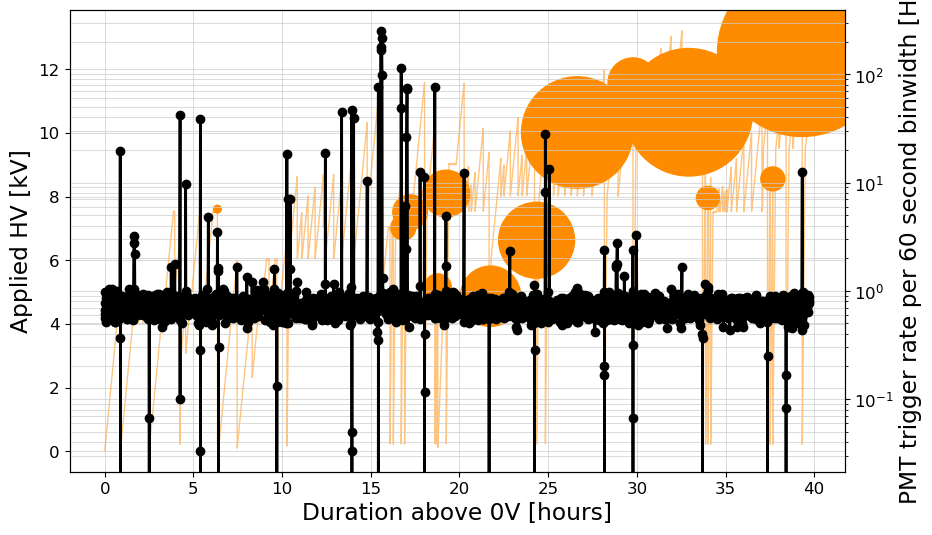

In [66]:
fig, ax = plt.subplots()

d = ana.df
mask = (d["ch3 amp"] > 2) & (d["ch3 amp"] != None)
d_ch = np.array(d[mask]["ch3 charge"])
d_sec = np.array(d[mask]["ch3 seconds"])
d_hv = np.array(d[mask]["ch3 hv"])
d_E = np.array(d[mask]["ch3 field"])

#recast time
hv_event_durs = [ana.get_duration_from_timestamp(_)/3600 for _ in d_sec]
ax.scatter(hv_event_durs, d_hv, s=list(np.array(d_ch)*20), color=colors[2], alpha=1)

ax2 = ax.twinx()
ax.plot(np.array(tdmap["dur"])/3600, tdmap["v"], color=colors[2], linewidth=1, alpha=0.5)
ax2.plot(durs, rate, 'ko-')
#ax.set_xlim([0, 5])
ax2.set_yscale('log')
ax.set_ylabel("Applied HV [kV]")
ax.set_xlabel("Duration above 0V [hours]")
ax2.set_ylabel("PMT trigger rate per 60 second binwidth [Hz]")
plt.show()


In [22]:
import time
#PMT rates

ana = anas[7]
ana.load_hv_textfiles()
ana.identify_ramps(ref='v_mon')
#an attempt to make code that will give me the HV ramp curve along with
#amplitudes and times of any charge  signals that arrive
tdmap = ana.time_duration_map
light_events = ana.get_light_triggers()
#cast the timestamps into duration space, rounding off
#a few decimal points of the nanosecond bits
#ALSO, only use one channel, as there will be double counting
#if both channels are used. They're all triggered for each event. 
ts = np.array(light_events["ch0 seconds"])
ts_ns = np.array(light_events["ch0 nanoseconds"]).astype(float)
ts_ms = ts + np.round(ts_ns/1.0e9, 3) #now its timestamps with ms precision

rate_binwidth = 60 #seconds
bins = np.arange(min(ts_ms), max(ts_ms), rate_binwidth)
timer0 = time.time()
n, bin_edges = np.histogram(ts_ms, bins=bins)
rate = np.array(n)/rate_binwidth #Hz
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
timer1 = time.time()

#how long is this?
timer0 = time.time()
durs = [ana.get_duration_from_timestamp(_)/3600 for _ in bin_centers]
timer1 = time.time()
print("Duration map took {:.2f} seconds".format(timer1 - timer0))






Duration map took 18.85 seconds


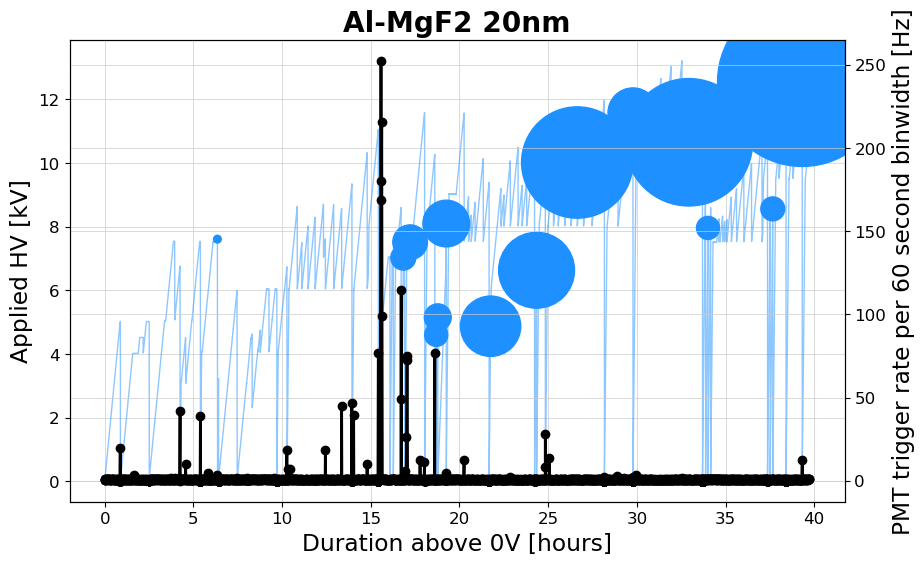

In [67]:
fig, ax = plt.subplots()

d = ana.df
mask = (d["ch3 amp"] > 2) & (d["ch3 amp"] != None)
d_ch = np.array(d[mask]["ch3 charge"])
d_sec = np.array(d[mask]["ch3 seconds"])
d_hv = np.array(d[mask]["ch3 hv"])
d_E = np.array(d[mask]["ch3 field"])

#recast time
hv_event_durs = [ana.get_duration_from_timestamp(_)/3600 for _ in d_sec]
ax.scatter(hv_event_durs, d_hv, s=list(np.array(d_ch)*20), color=colors[0], alpha=1)

ax2 = ax.twinx()
ax.plot(np.array(tdmap["dur"])/3600, tdmap["v"], color=colors[0], linewidth=1, alpha=0.5)
ax2.plot(durs, rate, 'ko-')
#ax.set_xlim([0, 5])
#ax2.set_xlim([0, 5])
ax.set_ylabel("Applied HV [kV]")
ax.set_xlabel("Duration above 0V [hours]")
ax2.set_ylabel("PMT trigger rate per 60 second binwidth [Hz]")
ax.set_title("Al-MgF2 20nm")
plt.show()
